In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

from sklearn.model_selection import train_test_split, learning_curve

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.stats.stattools import durbin_watson
from scipy import stats
from scipy.special import inv_boxcox

import missingno as msno

In [ ]:
Data = pd.read_csv('car data.csv')

1) PRELIMINARY EDA and FE (UNDERSTANDING THE DATASET AND REMOVING UNNECESSARY FEATURES/EDITING FEATURES)

In [ ]:
Data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
Data.info()
Data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


(301, 9)

In [ ]:
Data.describe(include='number')

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
numCols = Data.select_dtypes("number").columns
catCols = Data.select_dtypes("object").columns
numCols= list(set(numCols))
catCols= list(set(catCols))

Data_num=Data[numCols]
Data_cat=Data[catCols]

pd.Series(list(map(set,Data_cat.values.T)),index=Data_cat.columns)

Transmission                                  {Manual, Automatic}
Car_Name        {Bajaj Dominar 400, Bajaj Avenger 220 dtsi, om...
Seller_Type                                  {Dealer, Individual}
Fuel_Type                                   {Petrol, CNG, Diesel}
dtype: object

In [ ]:
pd.Series(list(map(set,Data_num.values.T)),index=Data_num.columns)

Selling_Price    {0.95, 1.95, 2.85, 3.35, 4.75, 4.6, 6.75, 7.25...
Year             {2016.0, 2017.0, 2018.0, 2003.0, 2004.0, 2005....
Owner                                              {0.0, 1.0, 3.0}
Kms_Driven       {4100.0, 213000.0, 21000.0, 43535.0, 42000.0, ...
Present_Price    {0.95, 1.78, 2.28, 3.6, 4.15, 5.59, 6.87, 7.85...
dtype: object

In [ ]:
Data.Car_Name.unique().shape

(98,)

In [ ]:
Data.head(100)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
95,corolla altis,2012,5.85,18.61,72000,Petrol,Dealer,Manual,0
96,innova,2016,20.75,25.39,29000,Diesel,Dealer,Automatic,0
97,corolla altis,2017,17.00,18.64,8700,Petrol,Dealer,Manual,0
98,corolla altis,2013,7.05,18.61,45000,Petrol,Dealer,Manual,0


In [ ]:
Data.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

<Axes: >

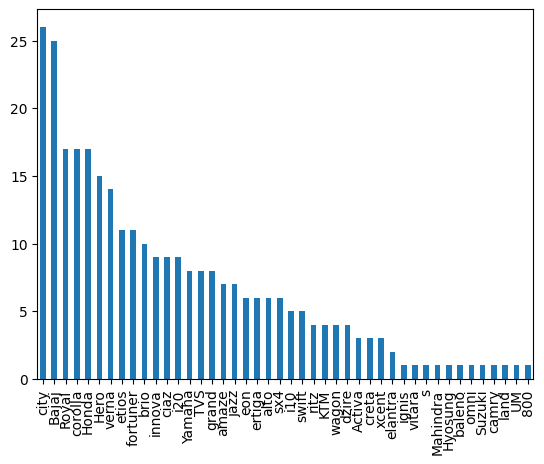

In [ ]:
Data['Car_Name'].str.split(' ').str[0].value_counts().plot.bar()

In [ ]:
# Name included many unique values compared to the length of the Dataset, so I got the brand name from the name column, so we
#can drop name now
Data.drop('Car_Name', axis=1, inplace=True)
Data_cat.drop('Car_Name', axis=1, inplace=True)

<ipython-input-12-2f1accb97a2e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_cat.drop('Car_Name', axis=1, inplace=True)


FEATURE ENGINEERING - SECONDARY EDA

In [ ]:
Data.insert(0, "Age", Data["Year"].max()+1-Data["Year"] )
Data_num.insert(0, "Age", Data["Year"].max()+1-Data["Year"] )
Data.drop('Year', axis=1, inplace=True)
Data_num.drop('Year', axis=1, inplace=True)
Data

<ipython-input-13-a67d785687bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_num.drop('Year', axis=1, inplace=True)


,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


DATA CLEARNING - 1) DUPLICATE ELIMINATION

In [ ]:

# no need to eliminate duplicates for this Data set since  it is expected to have
# similar catagorical labels for different rows.



dups = Data.duplicated(subset=['Selling_Price', 'Transmission','Seller_Type','Owner'])
dups


0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297     True
298     True
299    False
300     True
Length: 301, dtype: bool

Data CLEANING - 2) MISSING VALUE DETECTION AND ELIMINATION

In [ ]:
Data.isnull().sum()

Age              0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

DATA CLEANING - 3) OUTLIER DETECTION AND ELIMINATION

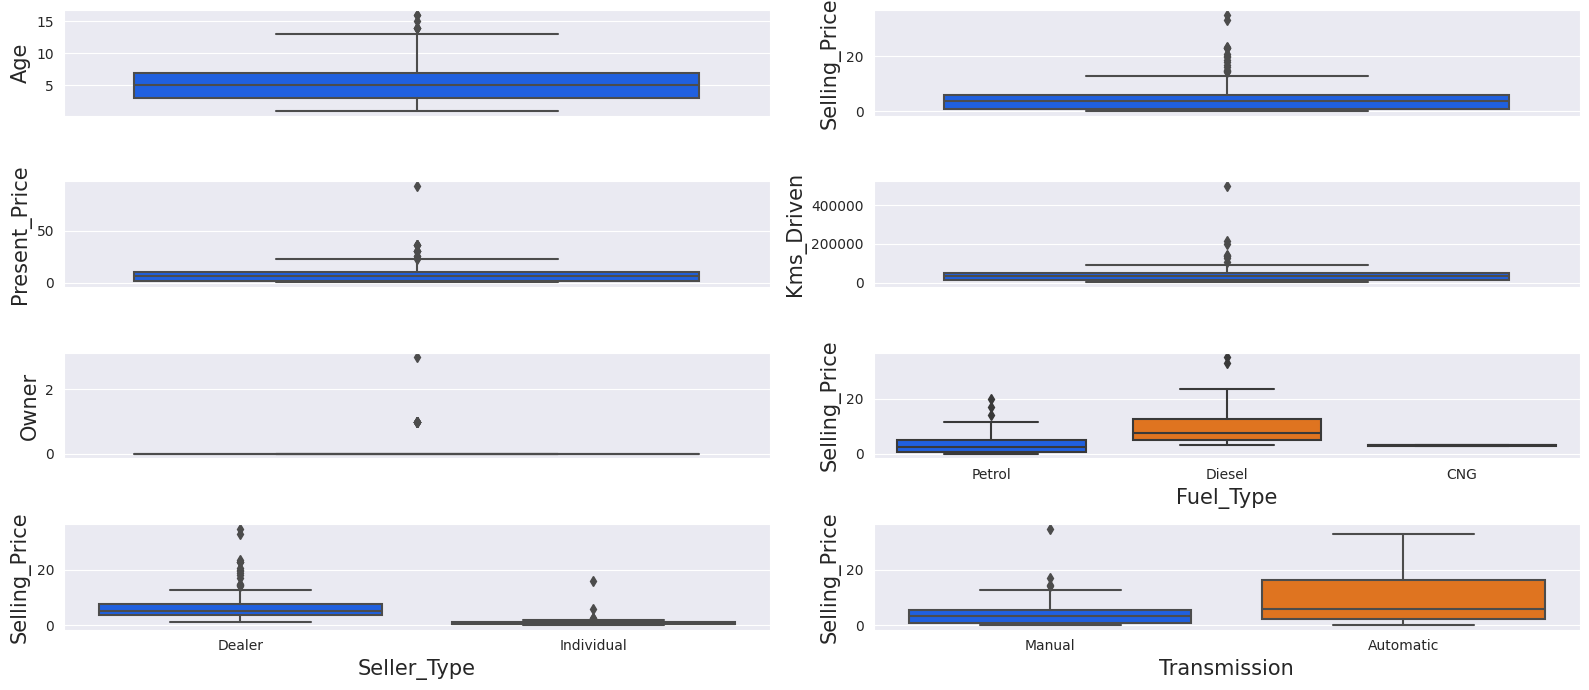

In [ ]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([Data.select_dtypes(exclude='object').columns.values,
                              Data.select_dtypes(include='object').columns.values])

fig, ax = plt.subplots(4, 2, figsize=(16,7),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//2
    y = i%2
    if i<5:
        sns.boxplot(data=Data, y=col, ax=ax[x,y])
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=Data, x=col, y='Selling_Price', ax=ax[x,y])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()
plt.show()

In [ ]:
cols = Data_num.columns.tolist()
Data[cols].dtypes

Age                int64
Selling_Price    float64
Owner              int64
Kms_Driven         int64
Present_Price    float64
dtype: object

In [ ]:
Data.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0


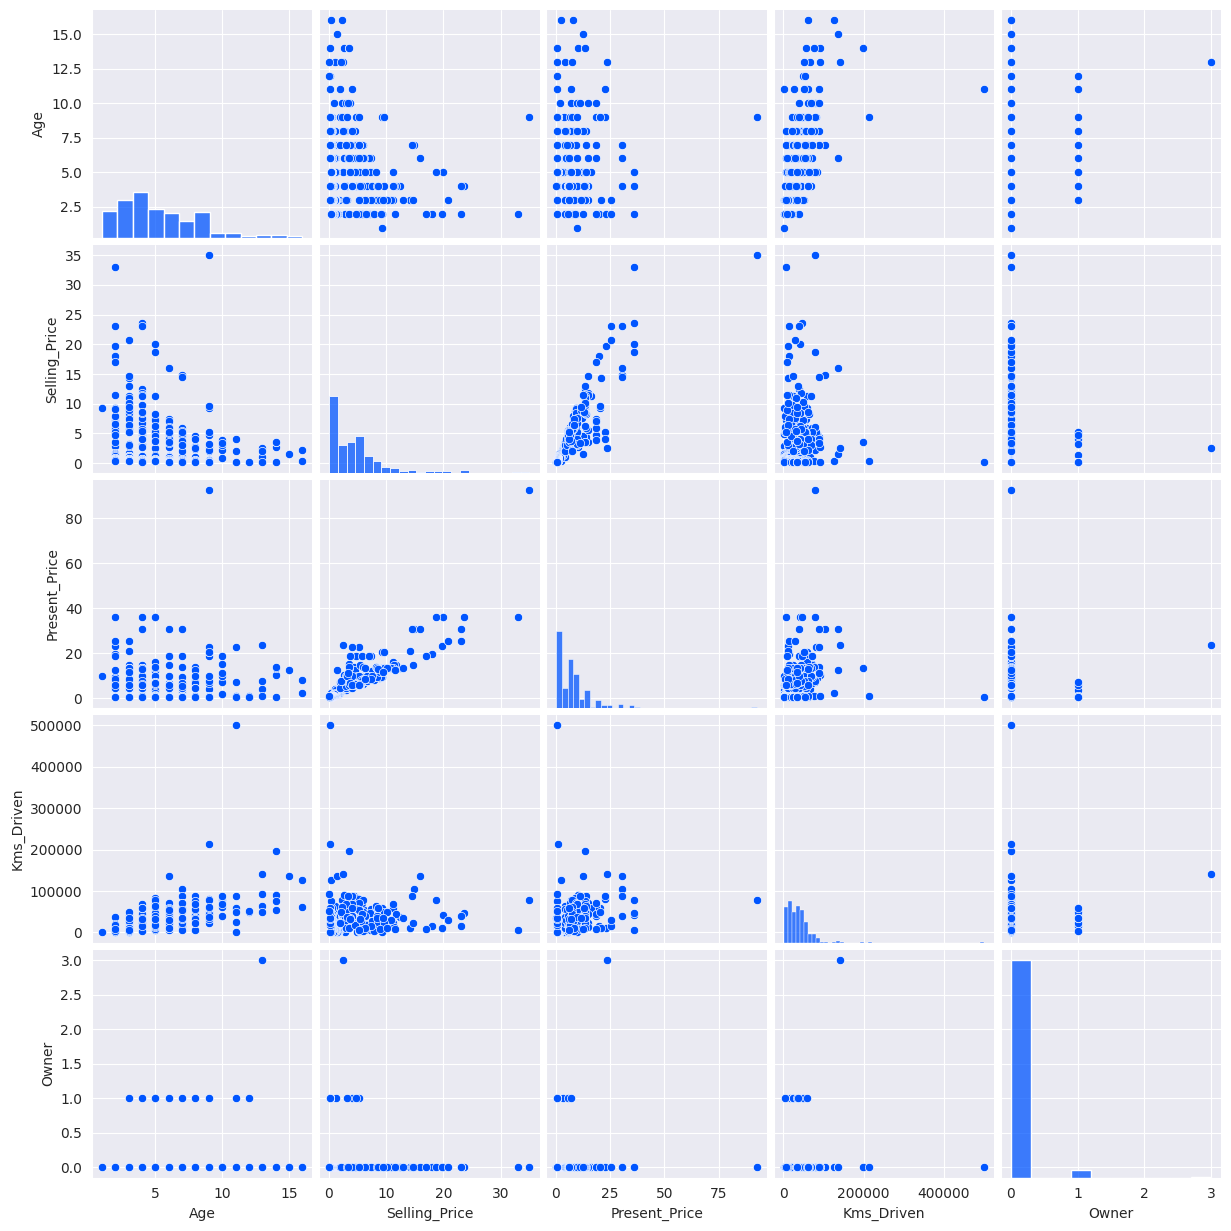

In [ ]:
sns.pairplot(Data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
<ipython-input-20-0a069a7385de>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_used['anomaly_scores'] = model_IF.decision_function(Data_used[anomaly_inputs])
<ipython-input-20-0a069a7385de>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_used['anomaly'] = model_IF.predict(Data_used[anomaly_inputs])


Outlier Method: Isolation Forest
Number of anomalous values 3
Number of non anomalous values  298
Total Number of Values: 301


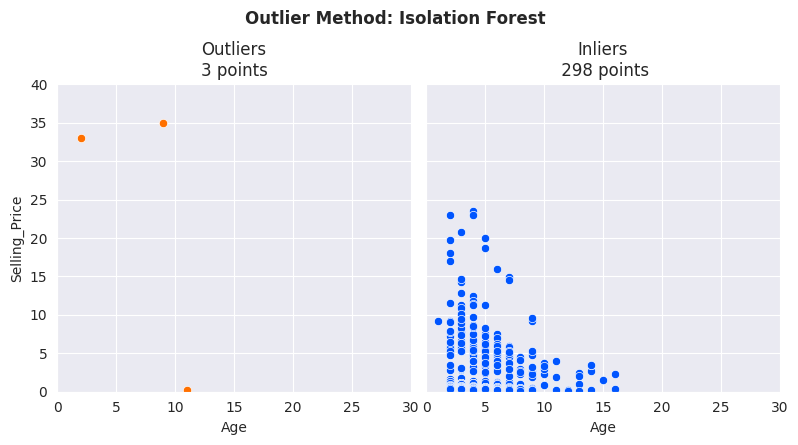

In [ ]:
def outlier_plot(Data, outlier_method_name, x_var, y_var,
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):

    print(f'Outlier Method: {outlier_method_name}')

    # Create a dynamic title based on the method
    method = f'{outlier_method_name}_anomaly'

    # Print out key statistics
    print(f"Number of anomalous values {len(Data[Data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(Data[Data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(Data)}')

    # Create the chart using seaborn
    g = sns.FacetGrid(Data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(Data[Data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(Data[Data['anomaly']==  1])} points")
    return g

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Data_scaled = scaler.fit_transform(Data_num)
#Data_scaled = pd.DataFrame(Data_scaled, columns=[
#  'age', 'selling_price', 'km_driven'])
Data_used=Data_num

anomaly_inputs=['Age', 'Selling_Price', 'Present_Price','Kms_Driven']
#model_IF = IsolationForest(contamination='auto', random_state=42)
model_IF = IsolationForest(n_estimators=100, max_samples='auto', contamination=.01, max_features=4,
                         bootstrap=False, n_jobs=1, random_state=1, verbose=0, warm_start=False)

model_IF.fit(Data_used[anomaly_inputs])

Data_used['anomaly_scores'] = model_IF.decision_function(Data_used[anomaly_inputs])
Data_used['anomaly'] = model_IF.predict(Data_used[anomaly_inputs])

outlier_plot(Data_used, 'Isolation Forest', 'Age', 'Selling_Price', xaxis_limits=[0,30], yaxis_limits=[0,40])



Outlier Method: Isolation Forest
Number of anomalous values 3
Number of non anomalous values  298
Total Number of Values: 301


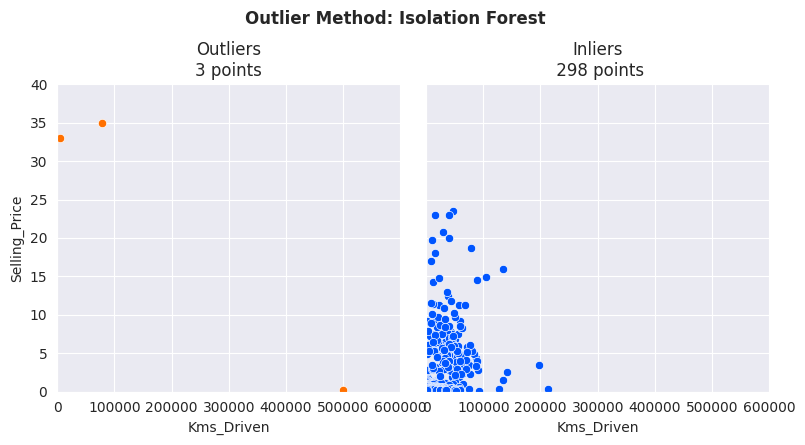

In [ ]:
outlier_plot(Data_used, 'Isolation Forest', 'Kms_Driven', 'Selling_Price', xaxis_limits=[0,600000], yaxis_limits=[0,40])

Outlier Method: Isolation Forest
Number of anomalous values 3
Number of non anomalous values  298
Total Number of Values: 301


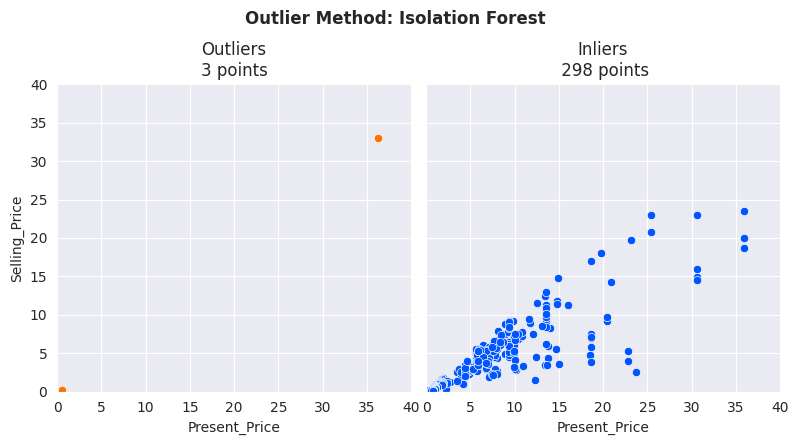

In [ ]:
outlier_plot(Data_used, 'Isolation Forest', 'Present_Price', 'Selling_Price', xaxis_limits=[0,40], yaxis_limits=[0,40])

In [ ]:
Data

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
def calculate_min_max(colname):
    q1 = Data[colname].quantile(0.25)
    q3 = Data[colname].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)

    return maximum,minimum

maximum1,minimum=calculate_min_max('Selling_Price')

Data['Selling_Price'].values[Data['Selling_Price'] > 25] = maximum1

maximum2,minimum=calculate_min_max('Kms_Driven')
Data['Kms_Driven'].values[Data['Kms_Driven'] > 300000] = maximum2

maximum3,minimum=calculate_min_max('Present_Price')
Data['Present_Price'].values[Data['Present_Price'] > 50] = maximum3

print(maximum1)
print(maximum2)
print(maximum3)

13.649999999999999
99417.5
22.950000000000003


In [ ]:
Data

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


4) EDA

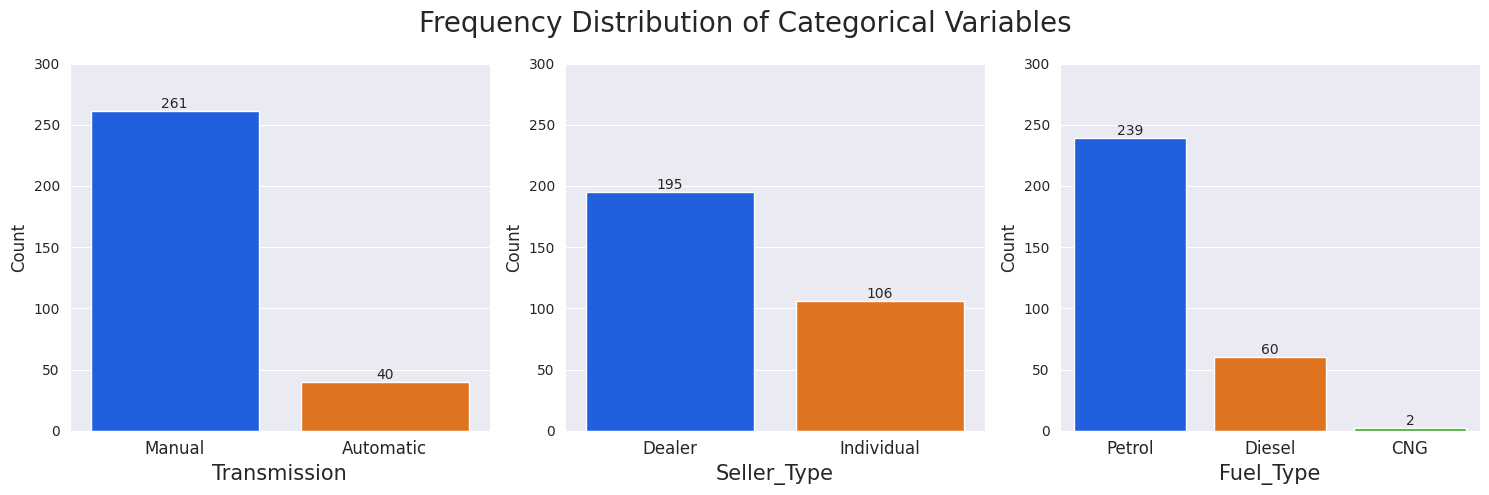

In [ ]:
Data_cat_names = ['Transmission', 'Seller_Type', 'Fuel_Type']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=100)
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

for i in range(len(Data_cat_names)):
    graph = sns.countplot(x=Data_cat_names[i], data=Data_cat, ax=ax[i])
    ax[i].set_xlabel(Data_cat_names[i], fontsize=15)
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].set_ylim([0,300])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=12)
    for cont in graph.containers:
        graph.bar_label(cont)

plt.suptitle('Frequency Distribution of Categorical Variables', fontsize=20)
plt.tight_layout()
plt.show()

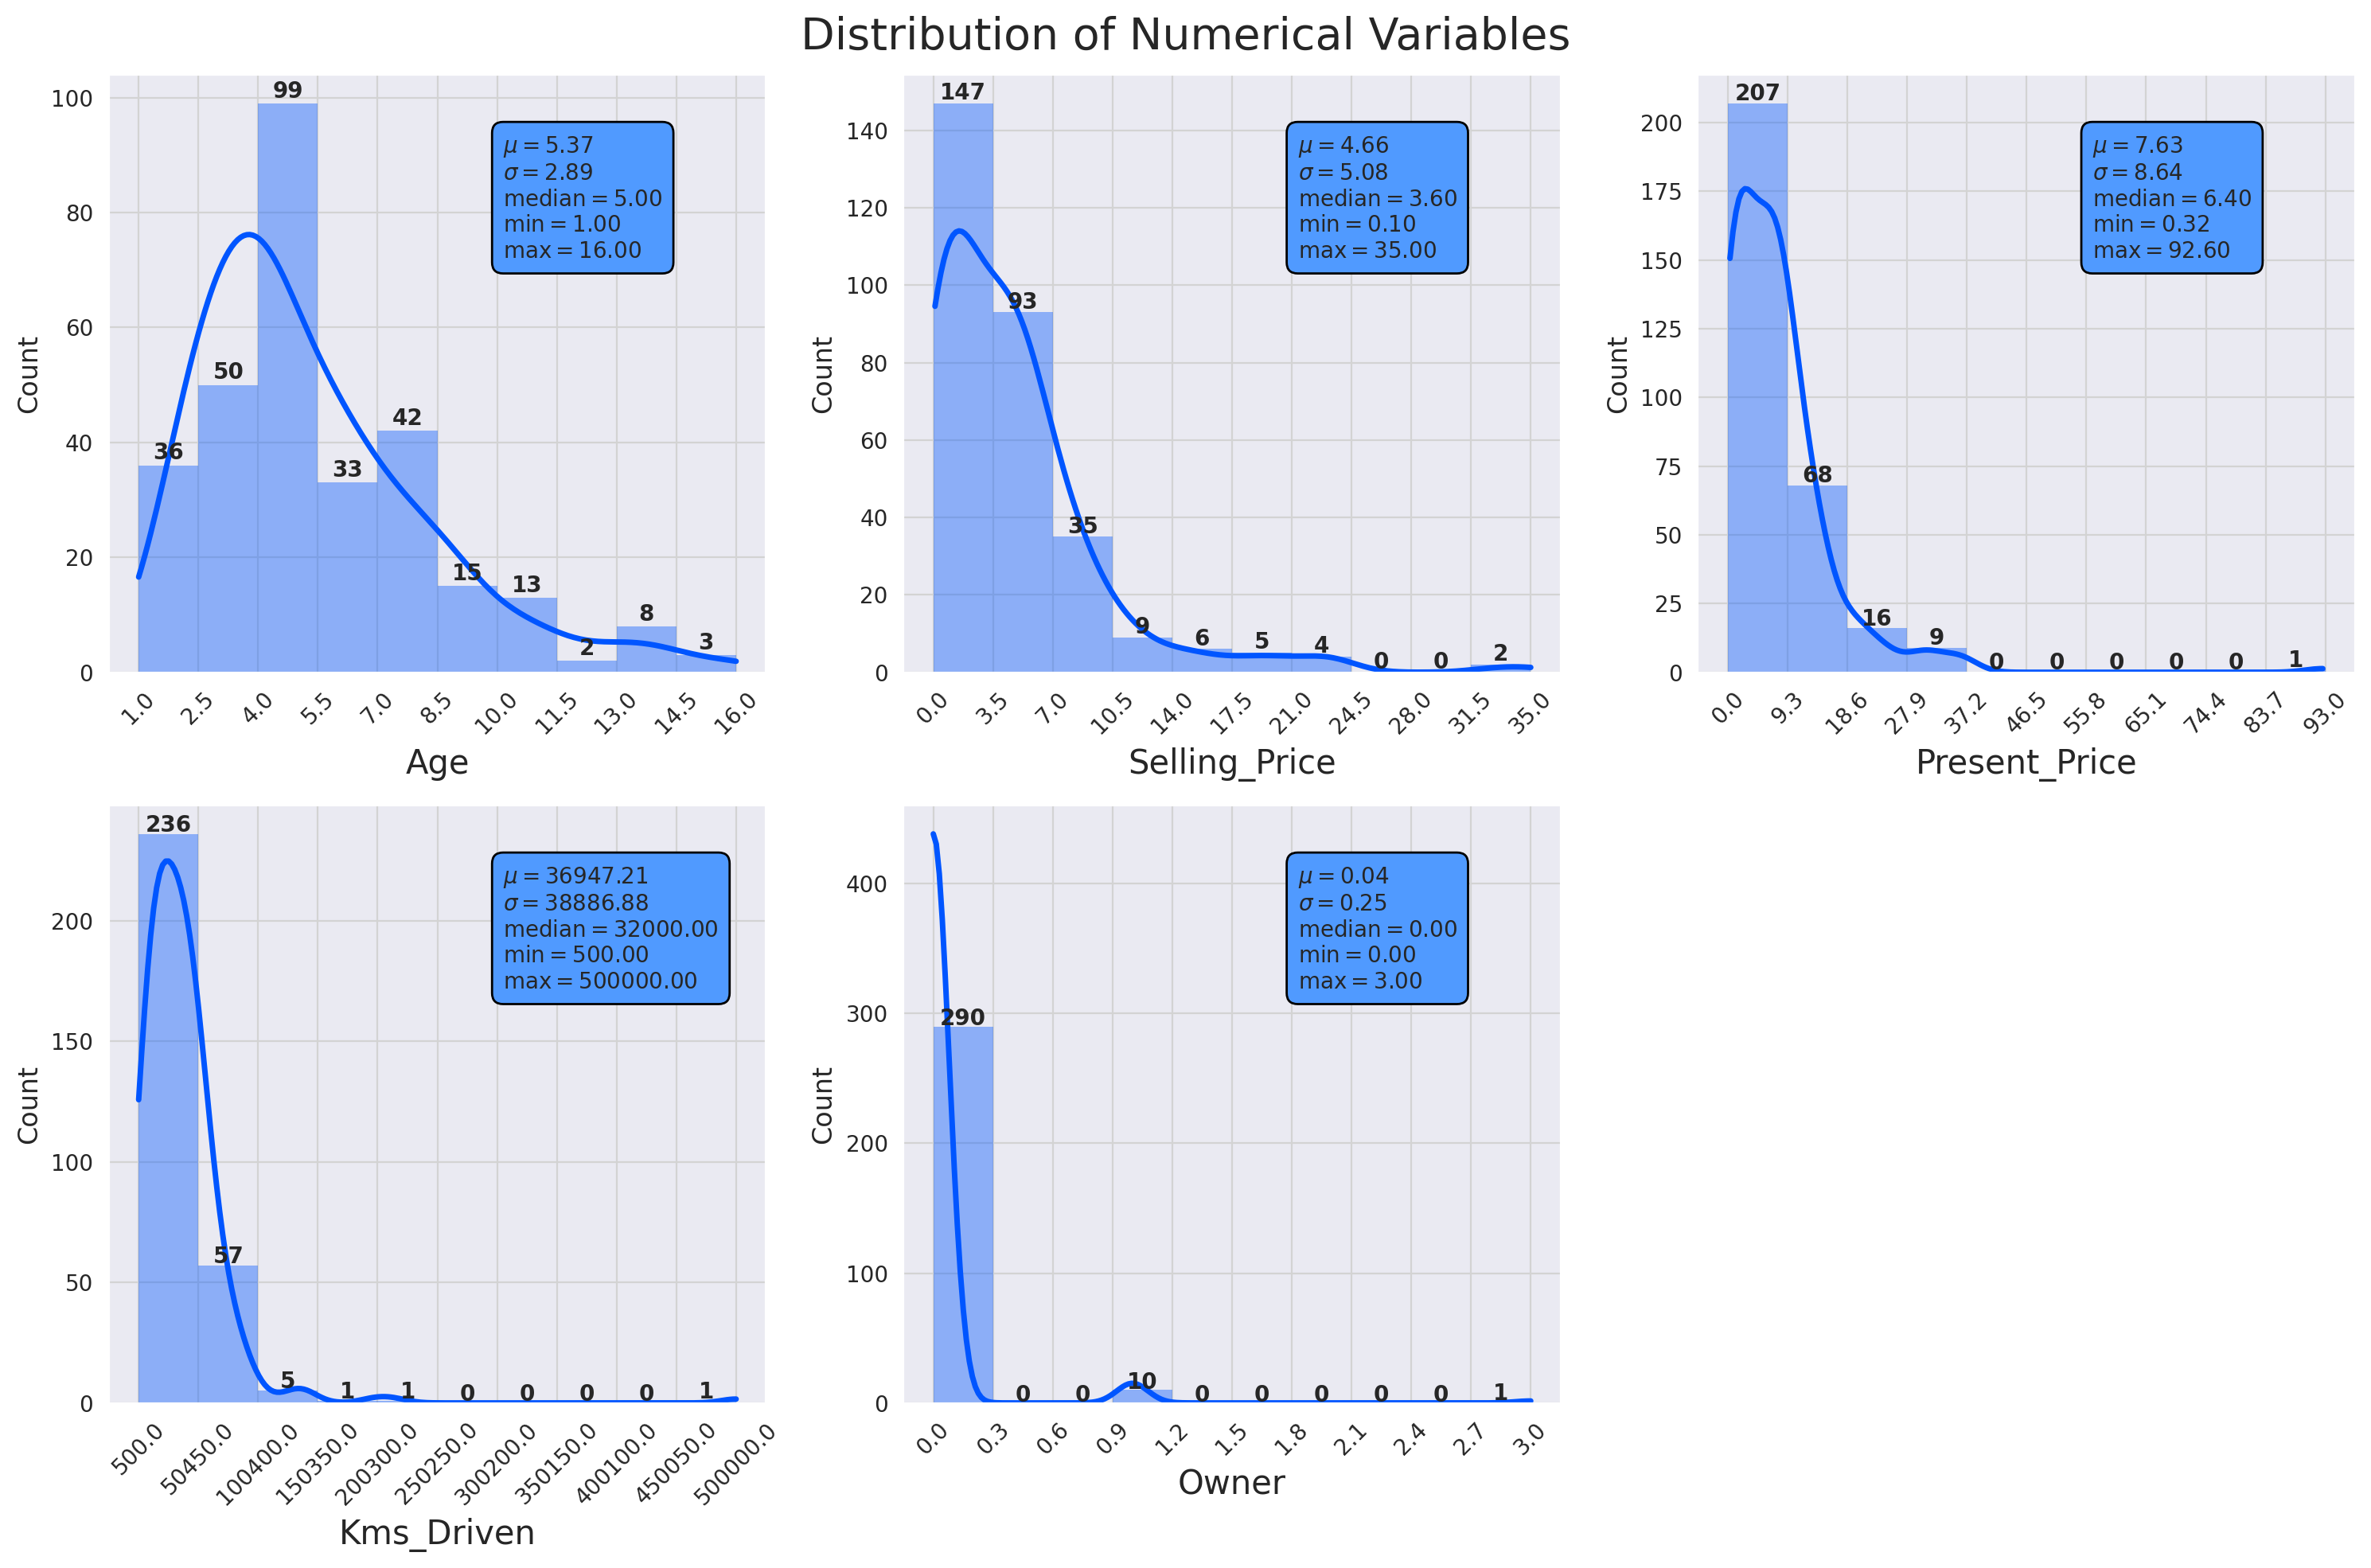

In [ ]:
Data_num_names = ['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10), dpi=200)
c = '#0055ff'

for i in range(len(Data_num_names)):
    row = i//3
    col = i%3
    values, bin_edges = np.histogram(Data_num[Data_num_names[i]],
                                     range=(np.floor(Data_num[Data_num_names[i]].min()), np.ceil(Data_num[Data_num_names[i]].max())))
    graph = sns.histplot(data=Data_num, x=Data_num_names[i], bins=bin_edges, kde=True, ax=ax[row,col],
                         edgecolor='none', color=c, alpha=0.4, line_kws={'lw': 2.5})
    ax[row,col].set_xlabel(Data_num_names[i], fontsize=15)
    ax[row,col].set_ylabel('Count', fontsize=12)
    ax[row,col].set_xticks(np.round(bin_edges,1))
    ax[row,col].set_xticklabels(ax[row,col].get_xticks(), rotation = 45)
    ax[row,col].grid(color='lightgrey')
    for j,p in enumerate(graph.patches):
        ax[row,col].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                             ha='center', fontsize=10 ,fontweight="bold")

    textstr = '\n'.join((
    r'$\mu=%.2f$' %Data_num[Data_num_names[i]].mean(),
    r'$\sigma=%.2f$' %Data_num[Data_num_names[i]].std(),
    r'$\mathrm{median}=%.2f$' %np.median(Data_num[Data_num_names[i]]),
    r'$\mathrm{min}=%.2f$' %Data_num[Data_num_names[i]].min(),
    r'$\mathrm{max}=%.2f$' %Data_num[Data_num_names[i]].max()
    ))
    ax[row,col].text(0.6, 0.9, textstr, transform=ax[row,col].transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='#509aff', edgecolor='black', pad=0.5))

ax[1, 2].axis('off')
plt.suptitle('Distribution of Numerical Variables', fontsize=20)
plt.tight_layout()
plt.show()

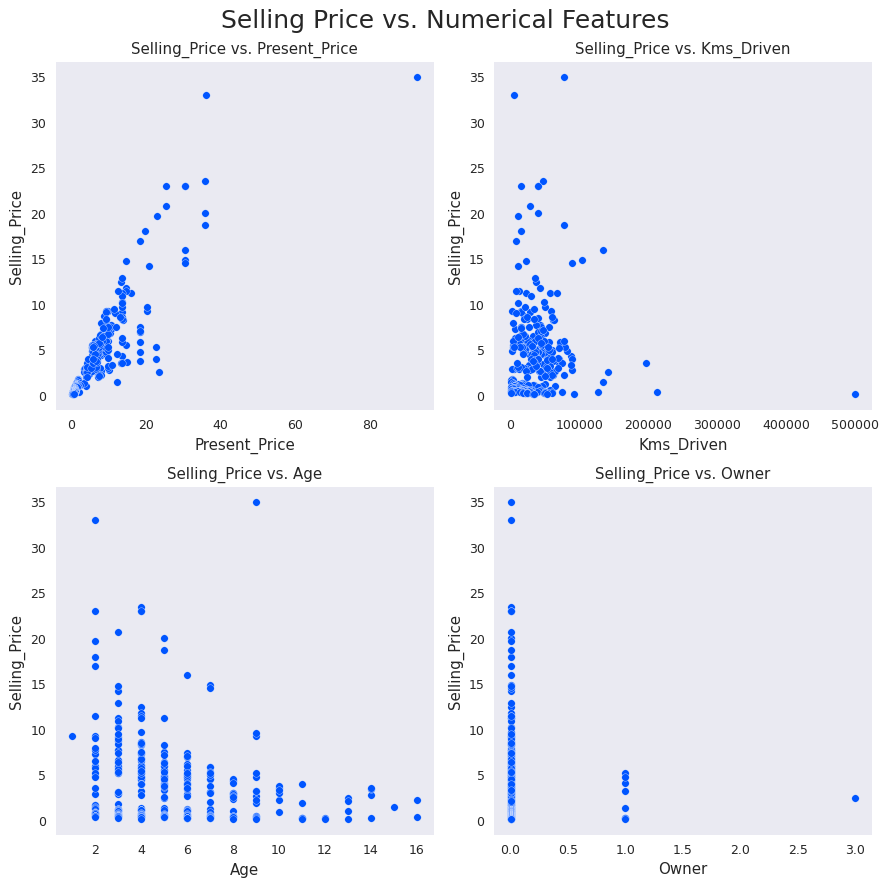

In [ ]:
fig, ax = plt.subplots(nrows=2 ,ncols=2, figsize=(10,10), dpi=90)
variable_features = ['Present_Price', 'Kms_Driven', 'Age', 'Owner']
target = 'Selling_Price'
c = '#0055ff'

for i in range(len(variable_features)):
    row = i//2
    col = i%2
    ax[row,col].scatter(Data_num[variable_features[i]], Data_num[target], color=c, edgecolors='w', linewidths=0.25)
    ax[row,col].set_title('{} vs. {}'.format(target, variable_features[i]), size = 12)
    ax[row,col].set_xlabel(variable_features[i], size = 12)
    ax[row,col].set_ylabel(target, size = 12)
    ax[row,col].grid()

plt.suptitle('Selling Price vs. Numerical Features', size = 20)
plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

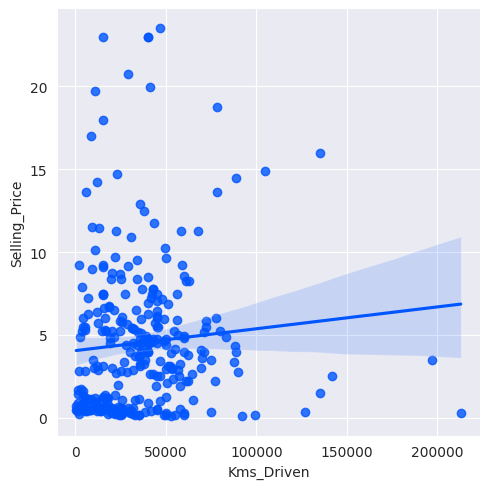

In [ ]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Kms_Driven',y='Selling_Price',data=Data)

<Figure size 1000x1000 with 0 Axes>

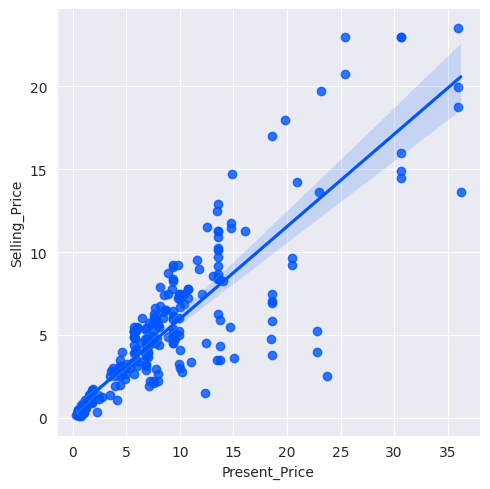

In [ ]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Present_Price',y='Selling_Price',data=Data)

<Axes: xlabel='Age', ylabel='Selling_Price'>

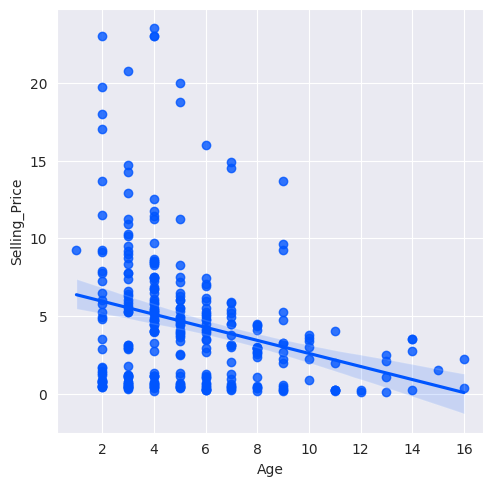

In [ ]:
plt.figure(figsize=(5.5,5.5))
sns.regplot(x='Age',y='Selling_Price',data=Data)

In [ ]:
Data.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
new_df=Data[['Age','Seller_Type','Transmission','Fuel_Type','Kms_Driven','Owner','Present_Price','Selling_Price']]
new_df.head(5)

,Age,Seller_Type,Transmission,Fuel_Type,Kms_Driven,Owner,Present_Price,Selling_Price
0,5,Dealer,Manual,Petrol,27000,0,5.59,3.35
1,6,Dealer,Manual,Diesel,43000,0,9.54,4.75
2,2,Dealer,Manual,Petrol,6900,0,9.85,7.25
3,8,Dealer,Manual,Petrol,5200,0,4.15,2.85
4,5,Dealer,Manual,Diesel,42450,0,6.87,4.60


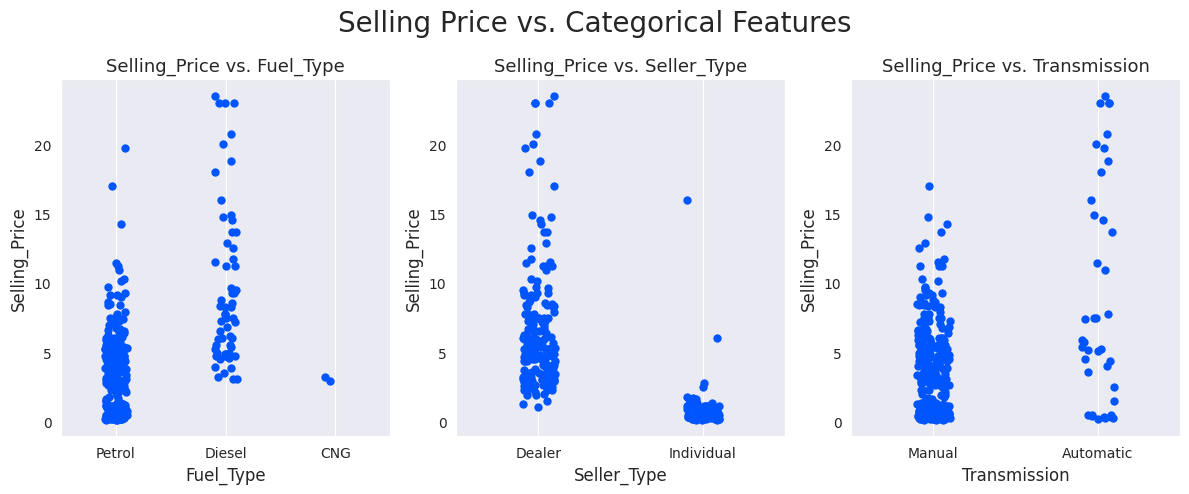

In [ ]:
fig, axes = plt.subplots(nrows=1 ,ncols=3, figsize=(12,5), dpi=100)
cat_features = ['Fuel_Type', 'Seller_Type', 'Transmission']
target = 'Selling_Price'
c = '#0055ff'

for i in range(len(cat_features)):
    sns.stripplot(ax=axes[i], x=cat_features[i], y=target, data=Data, size=6, color=c)
    axes[i].set_title('{} vs. {}'.format(target, cat_features[i]), size = 13)
    axes[i].set_xlabel(cat_features[i], size = 12)
    axes[i].set_ylabel(target, size = 12)
    axes[i].grid()

plt.suptitle('Selling Price vs. Categorical Features', size = 20)
plt.tight_layout()
plt.show()

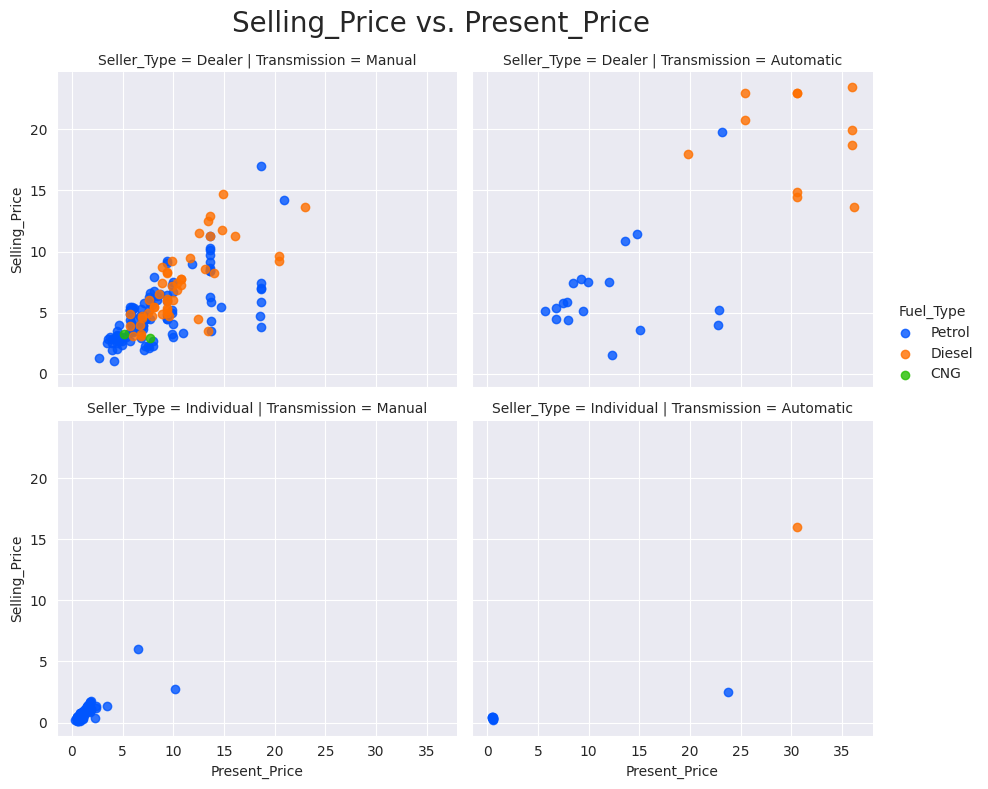

In [ ]:
graph = sns.lmplot(x='Present_Price', y='Selling_Price', data=new_df, fit_reg=False, row='Seller_Type',
                   col='Transmission', hue='Fuel_Type', palette=CustomPalette, height=4, aspect=1)

plt.suptitle('Selling_Price vs. Present_Price', fontsize=20)
sns.move_legend(graph, "lower center", bbox_to_anchor=(1.05, 0.5), ncol=1)
plt.tight_layout()
plt.show()

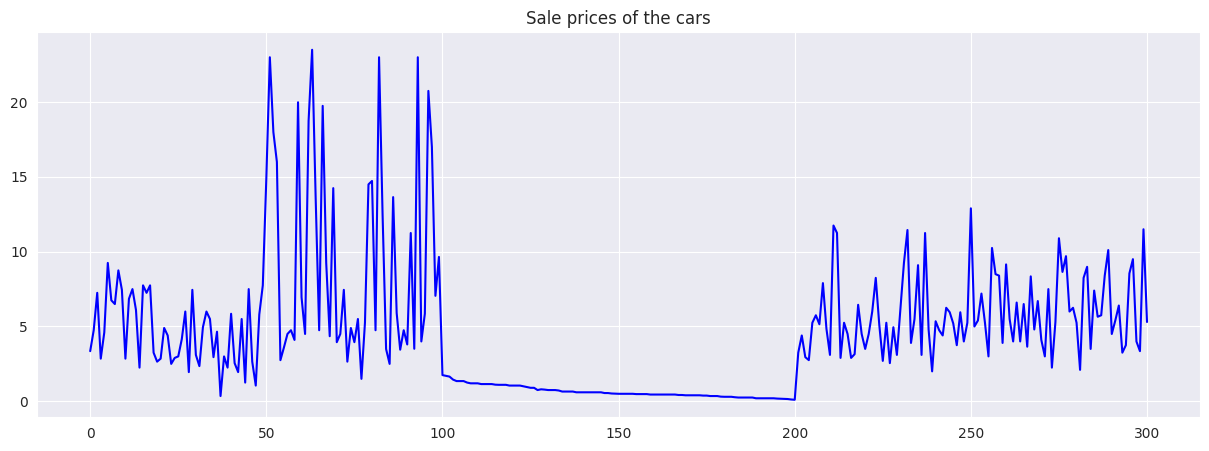

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))
sale_price = list()
for sp in Data["Selling_Price"].values:
    sale_price.append(sp)
sale_price = pd.Series(sale_price)
sale_price.plot(kind = "line", colormap = "winter").set_title("Sale prices of the cars");

In [ ]:
Data

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


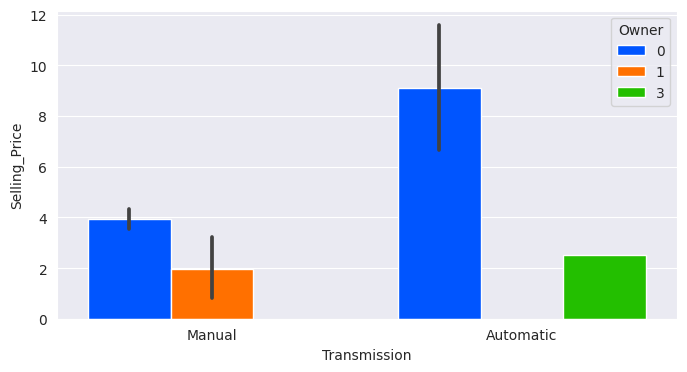

In [ ]:
plt.figure(figsize = (8, 4))
Data=Data
sns.barplot(x = "Transmission", y = "Selling_Price", hue = "Owner", data = new_df, saturation = 1);

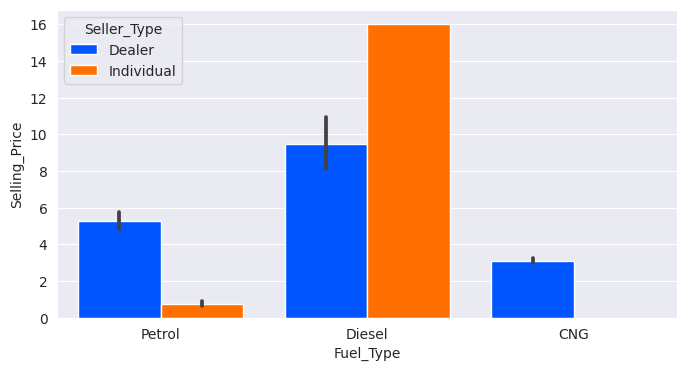

In [ ]:
plt.figure(figsize = (8, 4))
sns.barplot(x = "Fuel_Type", y = "Selling_Price", hue = "Seller_Type", data = Data, saturation = 1);

<ipython-input-40-265ee1291fc6>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(


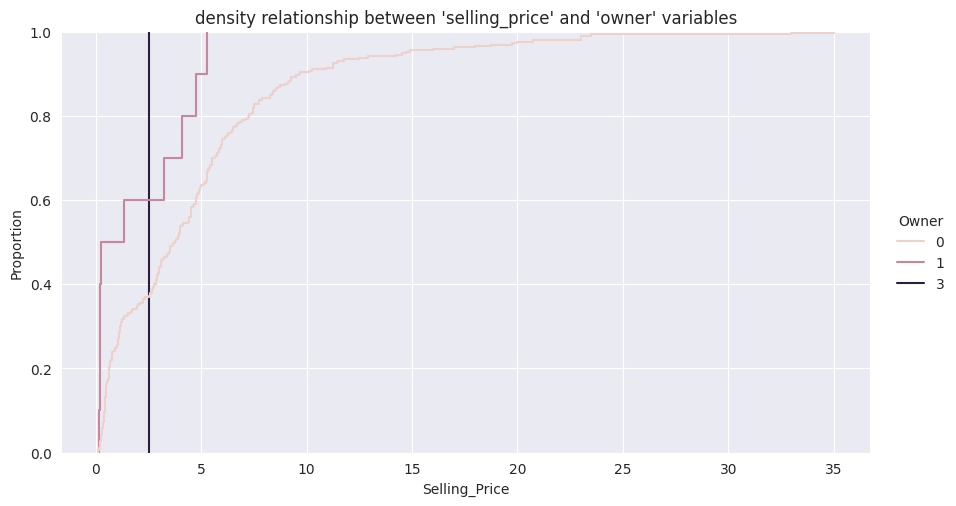

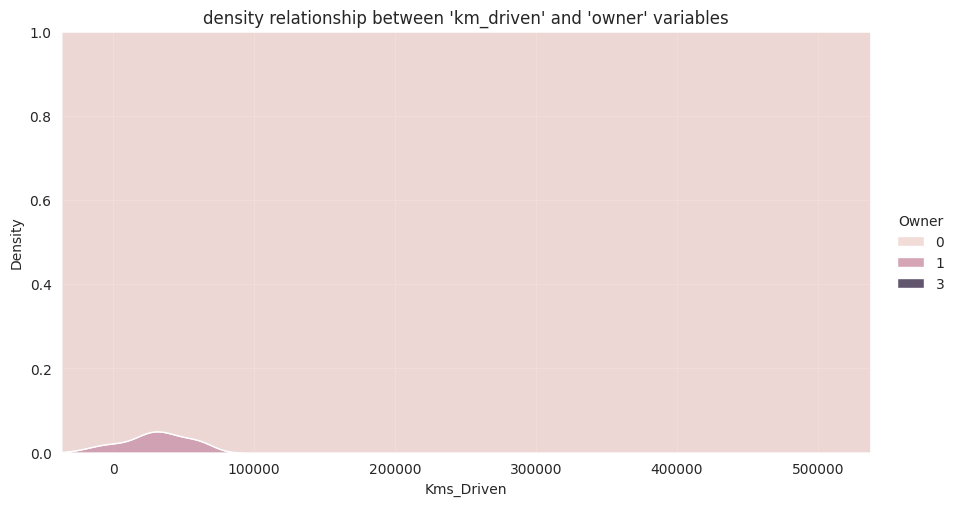

In [ ]:
sns.displot(
    data = Data_num, x = "Selling_Price", hue = "Owner",
    kind = "ecdf", height = 5, aspect = 1.8).set(title =  "density relationship between 'selling_price' and 'owner' variables");



sns.displot(
    data = Data_num, x = "Kms_Driven", hue = "Owner",
    kind = "kde", height = 5, aspect = 1.8, multiple="fill").set(title = "density relationship between 'km_driven' and 'owner' variables");

4) FEATURE ENCODING AND CORRELATION ANALYSIS

In [ ]:
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']

DataE = pd.get_dummies(Data, columns=CatCols, drop_first=True)
DataE.head(5)

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,3.35,5.59,27000,0,0,1,0,1
1,6,4.75,9.54,43000,0,1,0,0,1
2,2,7.25,9.85,6900,0,0,1,0,1
3,8,2.85,4.15,5200,0,0,1,0,1
4,5,4.60,6.87,42450,0,1,0,0,1


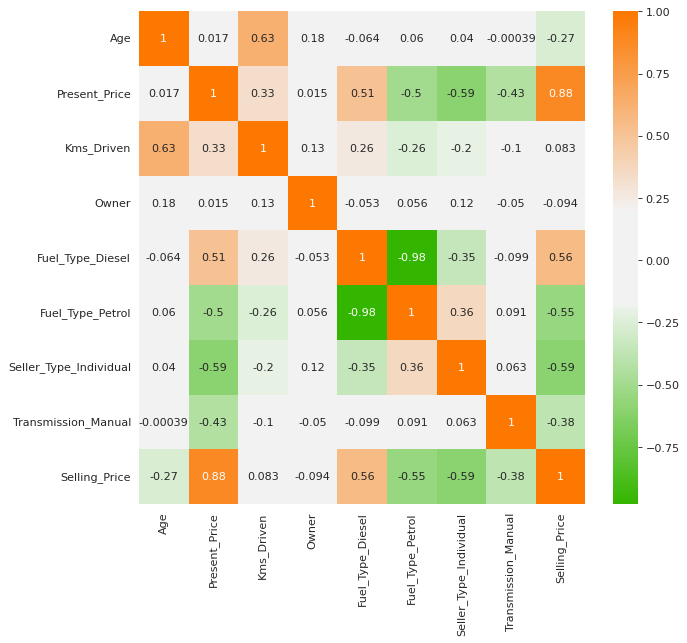

In [ ]:
target = 'Selling_Price'
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)
fig, ax = plt.subplots(figsize=(9, 8), dpi=80)
ax = sns.heatmap(pd.concat([DataE.drop(target,axis=1), DataE[target]],axis=1).corr(), annot=True, cmap=cmap)
plt.show()

5) B0X-COX TRANSFORMATION

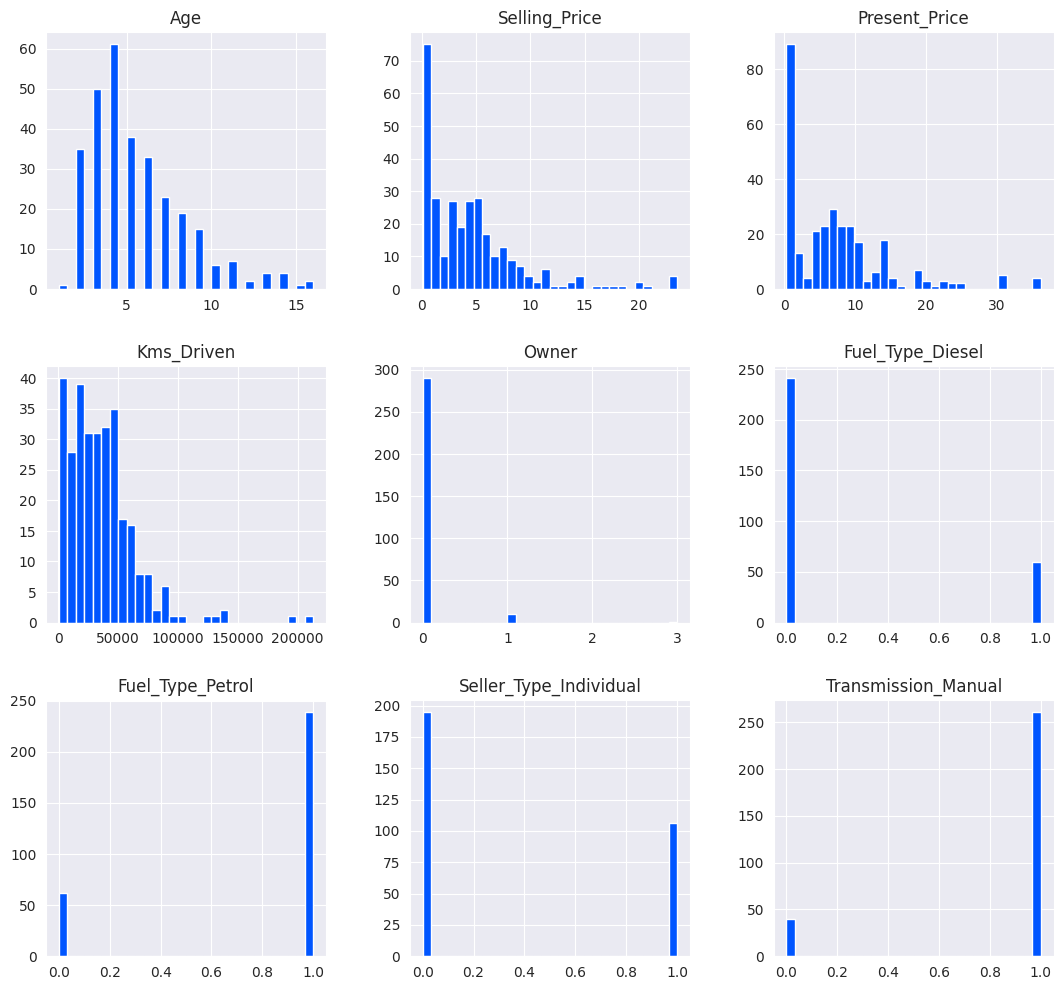

In [ ]:
DataE.hist(figsize = (13, 12), bins = 30, legend = False)
plt.show()

In [ ]:
Data2=DataE
Data_num_dis=['Selling_Price','Present_Price','Age','Kms_Driven']

skew_vars=DataE[Data_num_dis].skew()
skew_vars

Selling_Price    1.823727
Present_Price    1.701170
Age              1.246189
Kms_Driven       2.146623
dtype: float64

In [ ]:
skew_limit=0.75
skew_cols=(skew_vars.sort_values(ascending=False).to_frame().rename(columns={0:'skew'}).query('abs(skew) > {}'.format(skew_limit)))
skew_cols

,skew
Kms_Driven,2.146623
Selling_Price,1.823727
Present_Price,1.701170
Age,1.246189


In [ ]:
Data_t=Data
skew_vars=Data_t[Data_num_dis].skew()
skew_vars

Selling_Price    1.823727
Present_Price    1.701170
Age              1.246189
Kms_Driven       2.146623
dtype: float64

In [ ]:
for c in Data_num_dis:
    DataE[c] = np.log1p(DataE[c])



In [ ]:
skew_vars=DataE[Data_num_dis].skew()
skew_vars

Selling_Price    0.037762
Present_Price   -0.121345
Age              0.250693
Kms_Driven      -1.151619
dtype: float64

[Text(0.5, 1.0, 'After Transformation'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Value')]

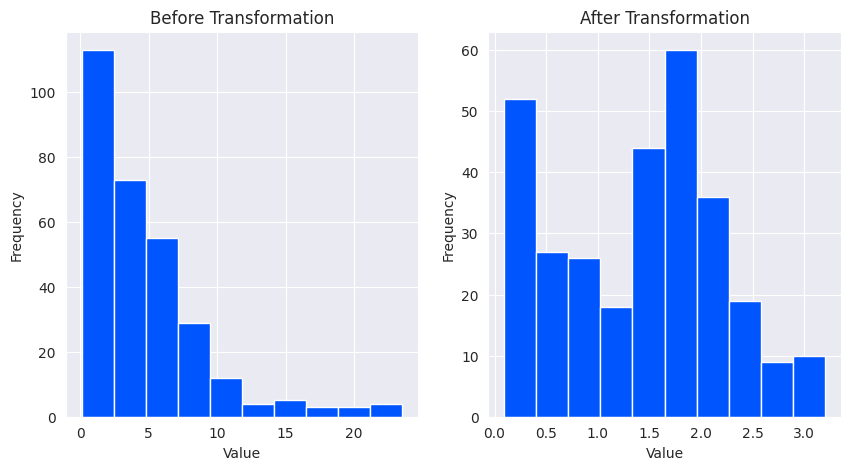

In [ ]:
field='Selling_Price'
fig, (ax_before,ax_after)=plt.subplots(1,2, figsize=(10,5))
Data[field].hist(ax=ax_before)
DataE[field].hist(ax=ax_after)

ax_before.set(title='Before Transformation', ylabel='Frequency', xlabel='Value')
ax_after.set(title='After Transformation', ylabel='Frequency', xlabel='Value')

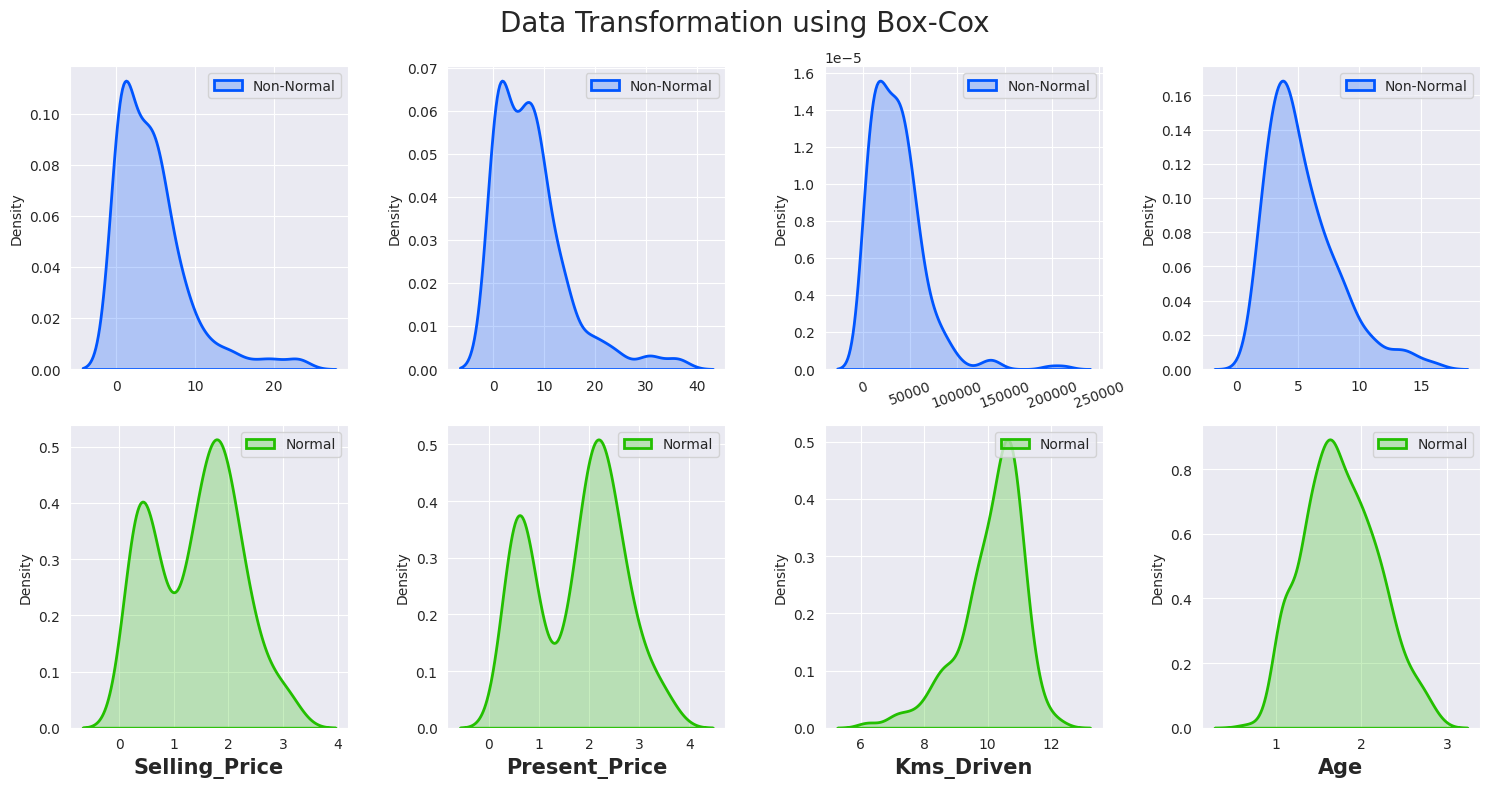

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(15,8), dpi=100)
columns = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age']

for i,col in enumerate(columns):
    sns.kdeplot(Data[col], label="Non-Normal", fill=True, color='#0055ff', linewidth=2, ax=ax[0,i])
    sns.kdeplot(DataE[col], label="Normal", fill=True, color='#23bf00', linewidth=2, ax=ax[1,i])
    ax[0,i].set_xlabel('', fontsize=15)
    ax[1,i].set_xlabel(col, fontsize=15, fontweight='bold')
    ax[0,i].legend(loc="upper right")
    ax[1,i].legend(loc="upper right")

ax[0,2].tick_params(axis='x', labelrotation = 20)
plt.suptitle('Data Transformation using Box-Cox', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
X = DataE.drop('Selling_Price', axis=1)
y = DataE['Selling_Price']

In [ ]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly_dummy = poly_features.fit_transform(X[['Age','Present_Price','Kms_Driven']])
X_poly_dummy = pd.DataFrame(X_poly_dummy, columns=poly_features.get_feature_names_out(['Age','Present_Price','Kms_Driven']))
X_poly_dummy.drop('Age', axis=1, inplace=True)
X_poly_dummy.drop('Present_Price', axis=1, inplace=True)
X_poly_dummy.drop('Kms_Driven', axis=1, inplace=True)
X_poly=pd.concat([X,X_poly_dummy], axis=1)

X_poly.head(5)

,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Age^2,Age Present_Price,...,Age^3,Age^2 Present_Price,Age^2 Kms_Driven,Age Present_Price^2,Age Present_Price Kms_Driven,Age Kms_Driven^2,Present_Price^3,Present_Price^2 Kms_Driven,Present_Price Kms_Driven^2,Kms_Driven^3
0,1.791759,1.885553,10.203629,0,0,1,0,1,3.210402,3.378458,...,5.752268,6.053384,32.757751,6.370263,34.472533,186.547332,6.703729,36.277079,196.312593,1062.341143
1,1.945910,2.355178,10.668979,0,1,0,0,1,3.786566,4.582964,...,7.368318,8.918036,40.398795,10.793694,48.895544,221.497320,13.063843,59.179344,268.083043,1214.418958
2,1.098612,2.384165,8.839422,0,0,1,0,1,1.206949,2.619273,...,1.325969,2.877566,10.668731,6.244779,23.152859,85.840482,13.552174,50.245422,186.287631,690.671516
3,2.197225,1.638997,8.556606,0,0,1,0,1,4.827796,3.601244,...,10.607752,7.912742,41.309548,5.902427,30.814426,160.870917,4.402854,22.985699,119.999980,626.476283
4,1.791759,2.063058,10.656106,0,1,0,0,1,3.210402,3.696504,...,5.752268,6.623246,34.210383,7.626102,39.390336,203.458928,8.780805,45.354609,234.265586,1210.028404


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)


In [ ]:
print('X_poly_train shape: ', X_train.shape)
print('X_poly_test shape: ', X_test.shape)
print('y_poly_train shape: ', y_train.shape)
print('y_poly_test shape: ',y_test.shape)

X_poly_train shape:  (210, 24)
X_poly_test shape:  (91, 24)
y_poly_train shape:  (210,)
y_poly_test shape:  (91,)


In [ ]:
def residuals(model, X_test, y_test):
    '''
    Creates predictions on the features with the model and calculates residuals
    '''
    y_pred = model.predict(X_test)
    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

    return df_results

def linear_assumption(model, X_test, y_test):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model
    '''
    df_results = residuals(model, X_test, y_test)

    fig, ax = plt.subplots(1,2, figsize=(15,6), dpi=80)
    sns.regplot(x='Predicted', y='Actual', data=df_results, lowess=True, ax=ax[0],
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    ax[0].set_title('Actual vs. Predicted Values', fontsize=15)
    ax[0].set_xlabel('Predicted', fontsize=12)
    ax[0].set_ylabel('Actual', fontsize=12)

    sns.regplot(x='Predicted', y='Residuals', data=df_results, lowess=True, ax=ax[1],
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=15)
    ax[1].set_xlabel('Predicted', fontsize=12)
    ax[1].set_ylabel('Residuals', fontsize=12)

def normal_errors_assumption(model, X_test, y_test, p_value_thresh=0.05):
    '''
    Function for inspecting the assumption of normality of residuals.
    '''
    df_results = residuals(model, X_test, y_test)

    # Anderson-Darling Test
    p_value = normal_ad(df_results['Residuals'])[1]

    print('\nP-value from the test (below 0.05 generally means non-normal):  ', np.round(p_value,6))
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed. Assumption not satisfied.')
    else:
        print('Residuals are normally distributed. Assumption satisfied.')


    # Residuals Histogram
    fig, ax = plt.subplots(1,2, figsize=(15,6), dpi=80)

    sns.histplot(data=df_results, x='Residuals', kde=True, ax=ax[0], bins=15,
                 color='#0055ff', edgecolor='none', alpha=0.4, line_kws={'lw': 2.5})
    ax[0].set_xlabel('Residuals', fontsize=12)
    ax[0].set_ylabel('Count', fontsize=12)
    ax[0].set_title('Distribution of Residuals', fontsize=15)
    textstr = '\n'.join((
        r'$\mu=%.2f$' %np.mean(df_results['Residuals']),
        r'$\sigma=%.2f$' %np.std(df_results['Residuals']),
        ))
    ax[0].text(0.7, 0.9, textstr, transform=ax[0].transAxes, fontsize=15, verticalalignment='top',
                 bbox=dict(boxstyle='round',facecolor='#509aff', edgecolor='black', pad=0.5))


    # Q-Q Probability Plot
    stats.probplot(df_results['Residuals'], dist="norm", plot= ax[1])
    ax[1].set_title("Residuals Q-Q Plot", fontsize=15)
    ax[1].set_xlabel('Theoretical Quantiles', fontsize=12)
    ax[1].set_ylabel('Ordered Values', fontsize=12)
    ax[1].get_lines()[0].set_markerfacecolor('#509aff')
    ax[1].get_lines()[1].set_color('#ff7000')
    ax[1].get_lines()[1].set_linewidth(2.5)
    ax[1].get_lines()[1].set_linestyle('--')
    ax[1].legend(['Actual','Theoretical'])

    plt.show()


def multicollinearity_assumption(X):
    ''''
    This assumes that predictors are not correlated with each other and calculates VIF values of predictors
    '''
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    possible_multicollinearity = sum([1 for v in vif if v > 10])
    definite_multicollinearity = sum([1 for v in vif if v > 100])

    print('{} cases of possible multicollinearity.'.format(possible_multicollinearity))
    print('{} cases of definite multicollinearity.'.format(definite_multicollinearity))

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied.')
        else:
            print('Assumption possibly satisfied.')
    else:
        print('Assumption not satisfied.')

    return pd.DataFrame({'vif': vif}, index=X.columns).round(2)

def autocorrelation_assumption(model, X_test, y_test):
    '''
    It assumes that there is no autocorrelation in the residuals. If there is autocorrelation, then
    there is a pattern that is not explained because the current value is dependent on the previous value.
    '''
    df_results = residuals(model, X_test, y_test)

    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', round(durbinWatson,3))

    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation. Assumption not satisfied.', '\n')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation. Assumption not satisfied.', '\n')
    else:
        print('Little to no autocorrelation. Assumption satisfied.', '\n')

def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)

    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

def coefplot(results):
    '''
    Takes in results of OLS model and returns a plot of
    the coefficients with 95% confidence intervals.

    Removes intercept, so if uncentered will return error.
    '''
    # Create dataframe of results summary
    coef_df = pd.DataFrame(results.summary().tables[1].data)

    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)

    # Set index to variable names
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)

    # Get errors; (coef - lower bound of conf interval)
    errors = coef_df['coef'] - coef_df['[0.025']

    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Drop the constant for plotting
    coef_df = coef_df.drop(['const'])

    # Sort values by coef ascending
    coef_df = coef_df.sort_values(by=['coef'])

    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)

    # Add variables column to dataframe
    coef_df['variables'] = variables

    # Set sns plot style back to 'poster'
    # This will make bars wide on plot
    sns.set_context("poster")

    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(15, 10))

    # Error bars for 95% confidence interval
    # Can increase capsize to add whiskers
    coef_df.plot(x='variables', y='coef', kind='bar',
                 ax=ax, color='none', fontsize=22,
                 ecolor='steelblue',capsize=0,
                 yerr='errors', legend=False)

    # Set title & labels
    plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
    ax.set_ylabel('Coefficients',fontsize=22)
    ax.set_xlabel('',fontsize=22)

    # Coefficients
    ax.scatter(x=pd.np.arange(coef_df.shape[0]),
               marker='o', s=80,
               y=coef_df['coef'], color='steelblue')

    # Line to define zero on the y-axis
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)

    return plt.show()


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge_cv_model = RidgeCV(alphas = alphas, cv = 3, scoring = 'neg_mean_squared_error')
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=3, scoring='neg_mean_squared_error')

In [ ]:
ridge_cv_model.alpha_

0.006609705742330144

In [ ]:
model_evaluation(ridge_cv_model, X_test, y_test, 'Ridge Reg. Test')


,Ridge Reg. Test
MAE,0.097335
MSE,0.020145
RMSE,0.141934
R2-Score,0.966829


In [ ]:
elastic_coef = pd.DataFrame(ridge_cv_model.coef_, index=X_poly.columns, columns=['Coefs'])
elastic_coef.T

,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Age^2,Age Present_Price,...,Age^3,Age^2 Present_Price,Age^2 Kms_Driven,Age Present_Price^2,Age Present_Price Kms_Driven,Age Kms_Driven^2,Present_Price^3,Present_Price^2 Kms_Driven,Present_Price Kms_Driven^2,Kms_Driven^3
Coefs,0.016584,0.799317,0.048886,-0.020605,0.095733,0.028105,-0.030348,-0.00494,-0.4091,0.874889,...,0.375671,-0.308159,-0.315661,-0.148227,-0.754563,0.102902,0.135207,0.505919,-0.06094,0.011317


<Axes: >

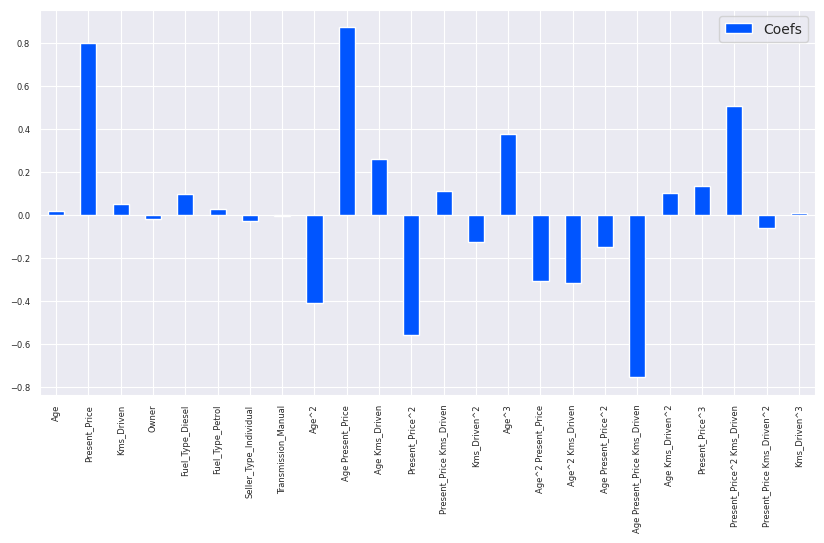

In [ ]:
elastic_coef.plot.bar(fontsize='6',width = 0.5,figsize=(10,5))

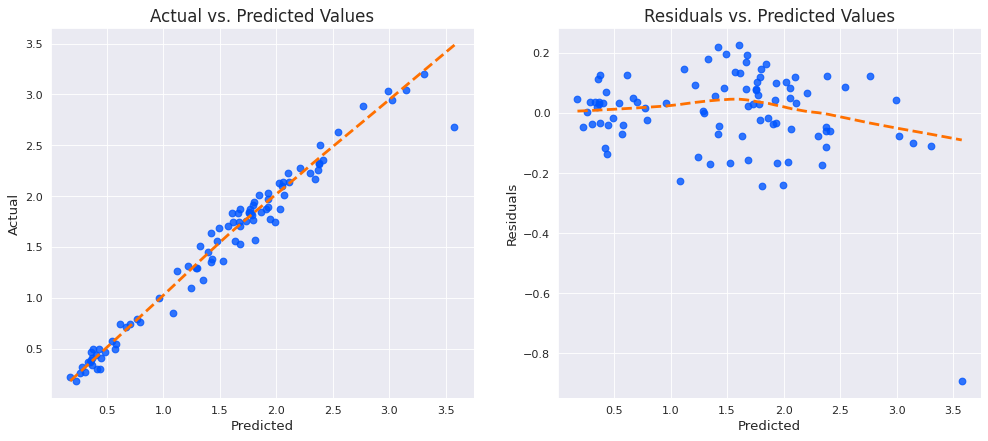

In [ ]:
linear_assumption(ridge_cv_model, X_test, y_test)


P-value from the test (below 0.05 generally means non-normal):   3.1e-05
Residuals are not normally distributed. Assumption not satisfied.


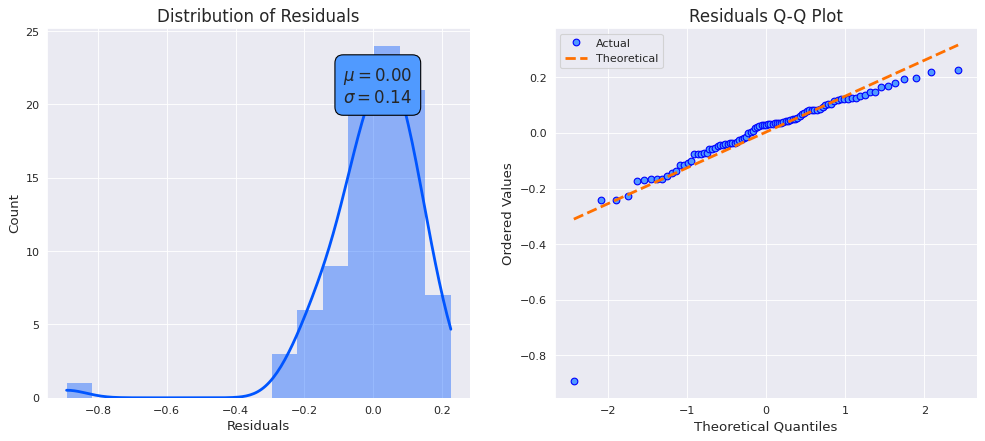

In [ ]:
normal_errors_assumption(ridge_cv_model, X_test, y_test)

In [ ]:
multicollinearity_assumption(X_poly).T

23 cases of possible multicollinearity.
20 cases of definite multicollinearity.
Assumption not satisfied.


,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Age^2,Age Present_Price,...,Age^3,Age^2 Present_Price,Age^2 Kms_Driven,Age Present_Price^2,Age Present_Price Kms_Driven,Age Kms_Driven^2,Present_Price^3,Present_Price^2 Kms_Driven,Present_Price Kms_Driven^2,Kms_Driven^3
vif,204218.96,63399.89,325977.66,1.21,31.91,122.42,13.29,11.6,68499.25,55100.84,...,14051.33,7481.37,169954.72,3220.14,145238.85,952136.57,827.81,27494.47,336383.31,770806.19


In [ ]:
autocorrelation_assumption(ridge_cv_model, X_test, y_test)


Durbin-Watson: 1.744
Little to no autocorrelation. Assumption satisfied. 



In [ ]:
def poly_check(degree, X, y):
    ridge_scores = []
    lasso_scores = []
    elasticnet_scores = []

    ridge_features = []
    lasso_features = []
    elasticnet_features = []

    for d in range(2,degree+1):
        poly_features = PolynomialFeatures(degree=d, include_bias=False)
        X_poly_dummy2 = poly_features.fit_transform(X[['Age','Present_Price','Kms_Driven']])
        X_poly_dummy2 = pd.DataFrame(X_poly_dummy2, columns=poly_features.get_feature_names_out(['Age','Present_Price','Kms_Driven']))
        X_poly_dummy2.drop('Age', axis=1, inplace=True)
        X_poly_dummy2.drop('Present_Price', axis=1, inplace=True)
        X_poly_dummy2.drop('Kms_Driven', axis=1, inplace=True)
        X_poly2=pd.concat([X,X_poly_dummy2], axis=1)
        X_train2, X_test2, y_train2, y_test2 = train_test_split(X_poly2, y, test_size=0.3, random_state=0)

        scaler = StandardScaler()
        scaler.fit(X_train2)
        X_train2 = scaler.transform(X_train2)
        X_test2 = scaler.transform(X_test2)

        # Ridge
        alphas = 10**np.linspace(10,-2,100)*0.5
        ridge_cv = RidgeCV(alphas = alphas, cv=3, scoring = 'neg_mean_squared_error')
        ridge_cv.fit(X_train2, y_train2)
        ridge_scores.append(ridge_cv.score(X_test2,y_test2))
        ridge_cols = ridge_cv.coef_[ridge_cv.coef_!=0].shape[0]
        ridge_features.append(ridge_cols)

        # Lasso
        lasso_cv = LassoCV(eps=0.01, n_alphas=100, max_iter=10000, cv=3)
        lasso_cv.fit(X_train2, y_train2)
        lasso_scores.append(lasso_cv.score(X_test2,y_test2))
        lasso_cols = lasso_cv.coef_[lasso_cv.coef_!=0].shape[0]
        lasso_features.append(lasso_cols)

        # Elastic-Net
        elastic_cv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, cv=3, max_iter=100000)
        elastic_cv.fit(X_train2, y_train2)
        elasticnet_scores.append(elastic_cv.score(X_test2,y_test2))
        elasticnet_cols = elastic_cv.coef_[elastic_cv.coef_!=0].shape[0]
        elasticnet_features.append(elasticnet_cols)

        del X_poly_dummy2, X_poly2, X_train2, X_test2, y_train2, y_test2

    scores = pd.DataFrame({'Ridge':ridge_scores, 'Lasso':lasso_scores, 'ElasticNet':elasticnet_scores}).round(4)
    scores = pd.concat([pd.DataFrame({'Degree':range(2,degree+1)}), scores], axis=1)
    feature_num = pd.DataFrame({'Ridge':ridge_features, 'Lasso':lasso_features, 'ElasticNet':elasticnet_features})
    feature_num = pd.concat([pd.DataFrame({'Degree':range(2,degree+1)}), feature_num], axis=1)
    return scores, feature_num

In [ ]:
scores, feature_num = poly_check(9, X, y)

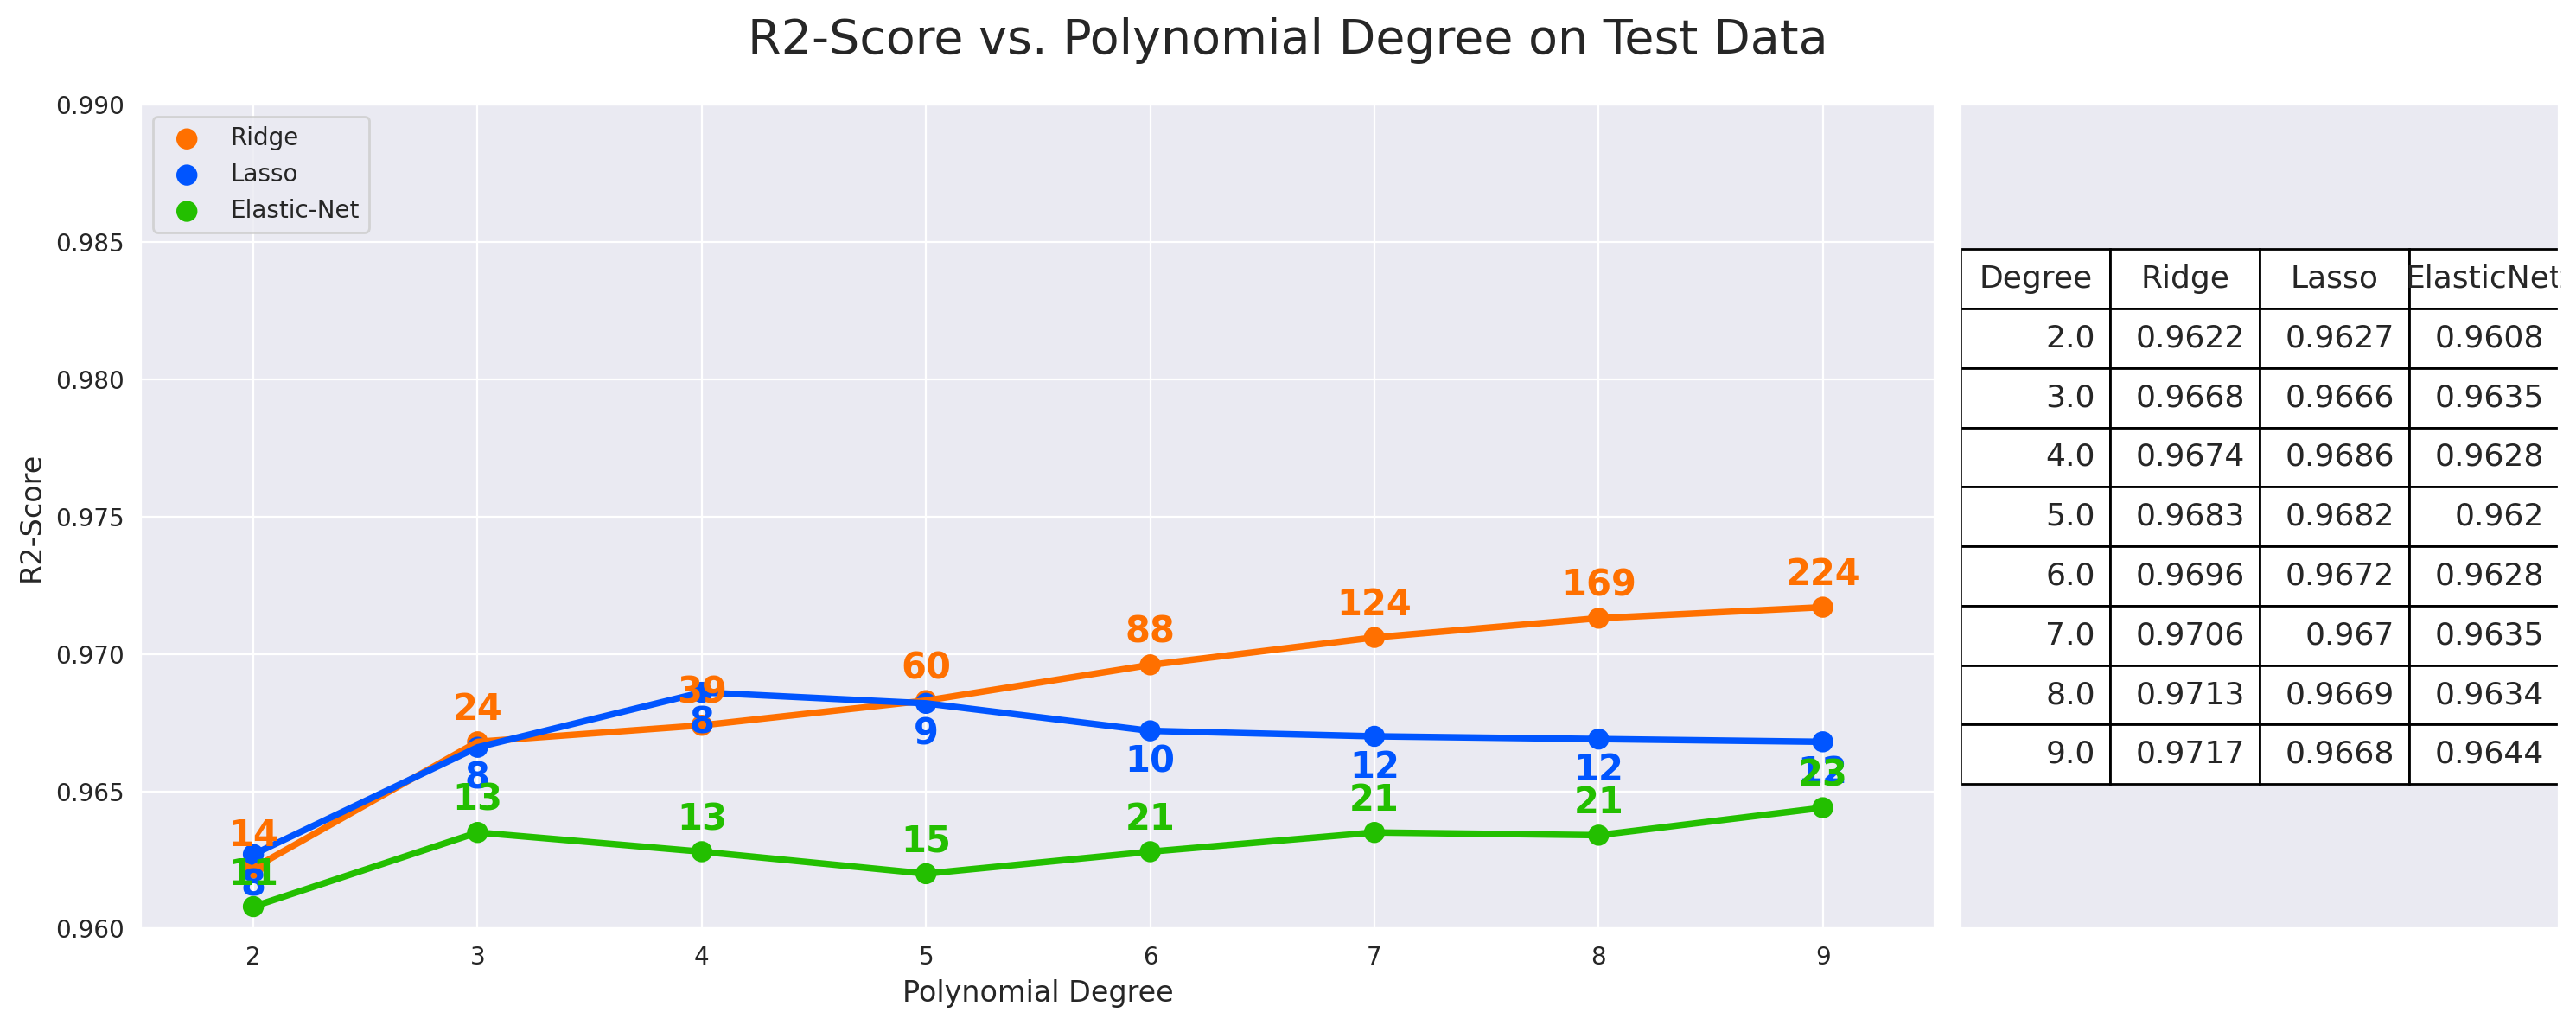

In [ ]:
# Plot1
fig, ax = plt.subplots(1, 2, figsize=(15,6), dpi=200, gridspec_kw={'width_ratios': [3, 1]})

sns.pointplot(x=scores['Degree'], y=scores['Ridge'], color='#ff7000', label='Ridge', ax=ax[0])
sns.pointplot(x=scores['Degree'], y=scores['Lasso'], color='#0055ff', label='Lasso', ax=ax[0])
sns.pointplot(x=scores['Degree'], y=scores['ElasticNet'], color='#23bf00', label='Elastic-Net', ax=ax[0])
ax[0].set_xlabel('Polynomial Degree', fontsize=12)
ax[0].set_ylabel('R2-Score', fontsize=12)
ax[0].legend(loc='upper left')
ax[0].grid(axis='x')
ax[0].set_ylim([0.96, 0.99])

# Annotate Points
for i,j,f in zip(scores['Degree']-2, scores['Ridge'], feature_num['Ridge']):
    ax[0].text(i, j+0.0008, str(f), ha='center', color='#ff7000', weight='bold', fontsize=15)

for i,j,f in zip(scores['Degree']-2, scores['Lasso'], feature_num['Lasso']):
    ax[0].text(i, j-0.0015, str(f), ha='center', color='#0055ff', weight='bold', fontsize=15)

for i,j,f in zip(scores['Degree']-2, scores['ElasticNet'], feature_num['ElasticNet']):
    ax[0].text(i, j+0.0008, str(f), ha='center', color='#23bf00', weight='bold', fontsize=15)

# Plot2
table = ax[1].table(cellText=scores.values, colLabels=scores.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(13)
ax[1].set_xticks([])
ax[1].set_yticks([])
table.scale(1, 2)

plt.suptitle('R2-Score vs. Polynomial Degree on Test Data', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly_dummy3 = poly_features.fit_transform(X[['Age','Present_Price','Kms_Driven']])
X_poly_dummy3 = pd.DataFrame(X_poly_dummy3, columns=poly_features.get_feature_names_out(['Age','Present_Price','Kms_Driven']))
X_poly_dummy3.drop('Age', axis=1, inplace=True)
X_poly_dummy3.drop('Present_Price', axis=1, inplace=True)
X_poly_dummy3.drop('Kms_Driven', axis=1, inplace=True)
X_poly3=pd.concat([X,X_poly_dummy3], axis=1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_poly3, y, test_size=0.3, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train3)
X_train3 = scaler.transform(X_train3)
X_test3 = scaler.transform(X_test3)


from sklearn.model_selection import GridSearchCV
import xgboost as xgb
regressor=xgb.XGBRegressor(eval_metric='rmsle')

xgboost_scores = []
xgboost_features = []

param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [100, 300, 500, 700],
              "learning_rate": [0.05,0.01, 0.015,0.020]}

search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train3, y_train3)
search.fit(X_train, y_train)
xgboost_scores.append(search.score(X_test,y_test))
#xgboost_col = search.coef_[search.coef_!=0].shape[0]
#xgboost_features.append(xgboost_col)



In [ ]:
model_evaluation(search, X_test, y_test, 'Ridge Reg. Test')

,Ridge Reg. Test
MAE,0.111895
MSE,0.021015
RMSE,0.144965
R2-Score,0.965398


In [ ]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly_dummy4 = poly_features.fit_transform(X[['Age','Present_Price','Kms_Driven']])
X_poly_dummy4 = pd.DataFrame(X_poly_dummy4, columns=poly_features.get_feature_names_out(['Age','Present_Price','Kms_Driven']))
X_poly_dummy4.drop('Age', axis=1, inplace=True)
X_poly_dummy4.drop('Present_Price', axis=1, inplace=True)
X_poly_dummy4.drop('Kms_Driven', axis=1, inplace=True)
X_poly4=pd.concat([X,X_poly_dummy4], axis=1)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_poly4, y, test_size=0.3, random_state=0)
ridge_scores2 = []
ridge_cols2 = []

scaler = StandardScaler()
scaler.fit(X_train4)
X_train2 = scaler.transform(X_train4)
X_test2 = scaler.transform(X_test4)

alphas = 10**np.linspace(10,-2,100)*0.5
lasso_cv2 = LassoCV(eps=0.01, n_alphas=100, max_iter=10000, cv=3)
lasso_cv2.fit(X_train4, y_train4)
ridge_scores2=lasso_cv2.score(X_test4,y_test4)
ridge_cols2 = lasso_cv2.coef_[lasso_cv2.coef_!=0].shape[0]


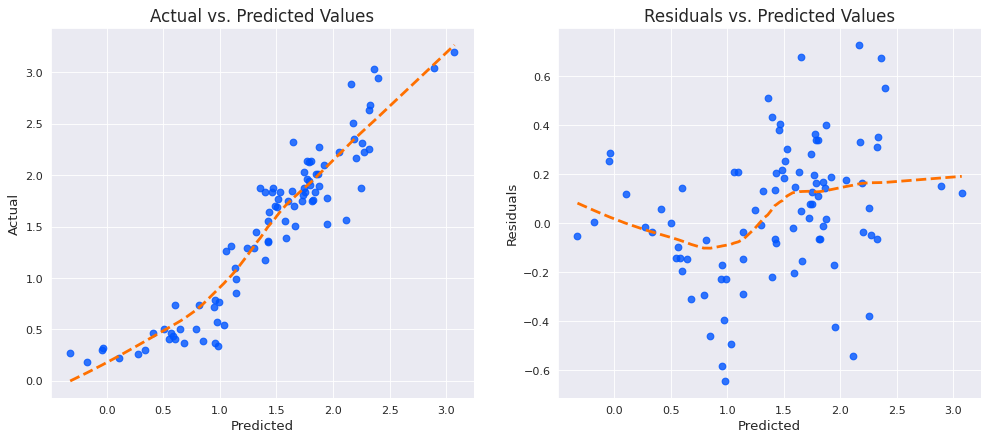

In [ ]:
linear_assumption(lasso_cv2, X_test4, y_test4)


P-value from the test (below 0.05 generally means non-normal):   0.006714
Residuals are not normally distributed. Assumption not satisfied.


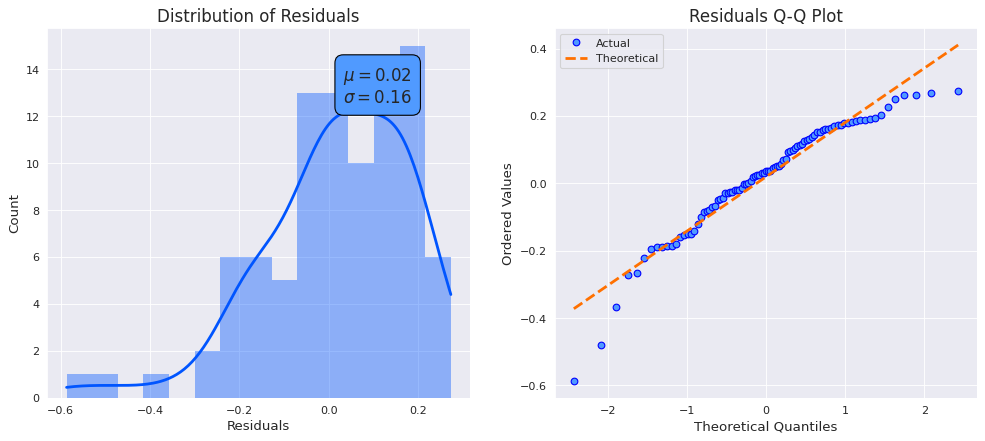

In [ ]:
normal_errors_assumption(lasso_cv2, X_test4, y_test4)

In [ ]:
model_evaluation(lasso_cv2, X_test4, y_test4, 'Ridge Reg. Test')


,Ridge Reg. Test
MAE,0.231126
MSE,0.084294
RMSE,0.290335
R2-Score,0.861204
